<a href="https://colab.research.google.com/github/81464-lucas/Programming-Essentials---Semester-2-/blob/main/Copia_de_MySecondthExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

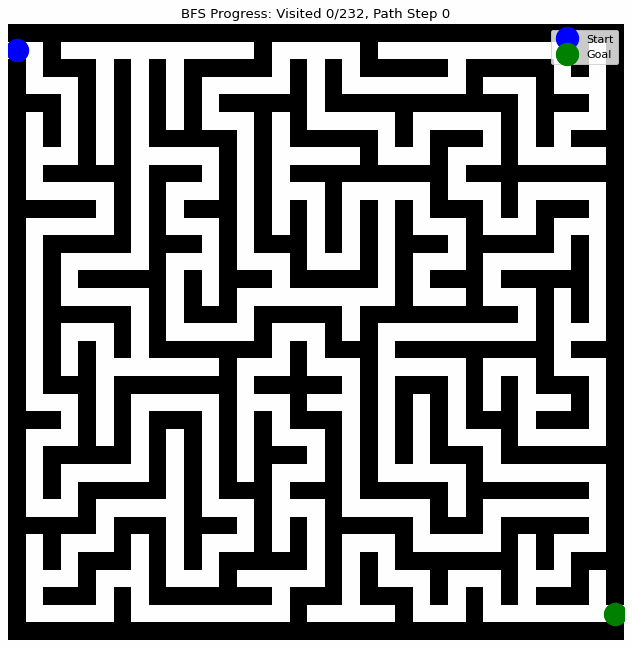

Path length: 187, Total visited: 232


In [ ]:
# STEP 1: Install required libraries
!pip install imageio --quiet

# STEP 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import random
from IPython.display import Image, display
from collections import deque

# STEP 3: Generate maze with guaranteed path
def generate_maze(width=35, height=35):
    maze = np.ones((height, width), dtype=int)
    visited = np.zeros((height, width), dtype=bool)
    stack = [(1, 1)]
    maze[1, 1] = 0
    visited[1, 1] = True

    while stack:
        y, x = stack[-1]
        neighbors = [(y+dy, x+dx) for dy, dx in [(-2,0),(2,0),(0,-2),(0,2)]
                     if 1 <= y+dy < height-1 and 1 <= x+dx < width-1 and not visited[y+dy, x+dx]]
        if neighbors:
            ny, nx = random.choice(neighbors)
            maze[ny, nx] = 0
            maze[(y + ny)//2, (x + nx)//2] = 0
            visited[ny, nx] = True
            stack.append((ny, nx))
        else:
            stack.pop()

    maze[1, 0] = 0  # Entrance
    maze[height-2, width-1] = 0  # Exit
    return maze

maze = generate_maze()
start = (1, 0)
goal = (maze.shape[0]-2, maze.shape[1]-1)

# STEP 4: Directions
directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]

# STEP 5: BFS with visited tracking for animation
def bfs_with_visited(maze, start, goal):
    height, width = maze.shape
    queue = deque([start])
    came_from = {start: None}
    visited = set([start])
    visited_order = [start]  # For animation

    while queue:
        current = queue.popleft()
        if current == goal:
            # Reconstruct path
            path = []
            at = goal
            while at is not None:
                path.append(at)
                at = came_from.get(at)
            return list(reversed(path)), visited_order

        y, x = current
        for dy, dx in directions:
            ny, nx = y + dy, x + dx
            if (0 <= ny < height and 0 <= nx < width and
                maze[ny, nx] == 0 and (ny, nx) not in visited):
                visited.add((ny, nx))
                visited_order.append((ny, nx))
                came_from[(ny, nx)] = current
                queue.append((ny, nx))
    return [], []

path, visited_order = bfs_with_visited(maze, start, goal)

# STEP 6: Animated GIF with BFS exploration (blue visited, red path)
frames = []
gif_dir = "/tmp/bfs_maze_frames"
os.makedirs(gif_dir, exist_ok=True)

max_steps = min(554, len(visited_order))  # ~554 frames for smooth GIF
for i in range(max_steps + 1):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(maze, cmap='gray_r')

    # Visited cells up to i (BFS progression)
    if i > 0:
        vis_y, vis_x = zip(*visited_order[:i])
        ax.scatter(vis_x, vis_y, c='blue', s=10, alpha=0.6)

    # Path up to current (if reached)
    path_step = min(i, len(path))
    if path_step > 0:
        p_y, p_x = zip(*path[:path_step])
        ax.plot(p_x, p_y, 'r-o', linewidth=4, markersize=8)

    ax.plot(start[1], start[0], 'bo', markersize=20, label='Start')
    ax.plot(goal[1], goal[0], 'go', markersize=20, label='Goal')
    ax.set_title(f"BFS Progress: Visited {i}/{len(visited_order)}, Path Step {path_step}")
    ax.legend()
    ax.axis('off')

    frame_path = f"{gif_dir}/frame_{i:03d}.png"
    plt.savefig(frame_path, bbox_inches='tight', dpi=80)
    plt.close()
    frames.append(imageio.imread(frame_path))

imageio.mimsave('/tmp/bfs_maze.gif', frames, fps=10)
display(Image(filename='/tmp/bfs_maze.gif'))
print(f"Path length: {len(path)}, Total visited: {len(visited_order)}")
